<a href="https://colab.research.google.com/github/SimeonHristov99/ML_21-22/blob/main/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello, [scikit-learn](https://scikit-learn.org/stable/)! Linear Regression

Accoding to the official website:

Machine Learning in Python

- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

![scikit-learn algorithm map](https://scikit-learn.org/stable/_static/ml_map.png)

## What did *$X$* and *$y$* mean?

$X$ (note that it's upper-case) and $y$ (note that it's lower-case) are the input that is fed in our machine learning algorithm. $X$ is always a **matrix** (i.e. a table) of data in which each line is an observation or a **sample** and each column is a characteristic or a **feature** of the samples. $y$ is always a **vector** with the values our model has to learn to predict.

| Възраст | Коли | Къща | Деца | Женен?   | Куче? | Диплома   | Купува лодка? |
| ------- | ---- | ---- | ---- | -------- | ----- | --------- | :-----------: |
| 66      | 1    | да   | 2    | вдовец   | не    | Отличен   |    **да**     |
| 52      | 2    | не   | 3    | женен    | не    | Добър     |    **да**     |
| 22      | 0    | не   | 0    | женен    | да    | Мн. добър |    **не**     |
| 25      | 1    | не   | 1    | неженен  | не    | Добър     |    **не**     |
| 44      | 0    | не   | 2    | разведен | не    | Среден    |    **не**     |
| 39      | 1    | да   | 2    | женен    | да    | Мн. добър |    **не**     |
| 26      | 1    | не   | 2    | неженен  | не    | Отличен   |    **не**     |
| 40      | 3    | да   | 1    | женен    | да    | Добър     |    **не**     |
| 53      | 2    | да   | 2    | разведен | не    | Отличен   |    **да**     |
| 64      | 2    | да   | 3    | разведен | не    | Отличен   |    **да**     |
| 58      | 2    | да   | 2    | женен    | да    | Добър     |    **да**     |
| 33      | 1    | не   | 1    | неженен  | не    | Мн. добър |    **не**     |

Let's answer the following questions:

- Which columns make up $X$?
- Which columns make up $y$?
- Can $y$ be more than 1 column?
- Is this dataset ready to be passed to our model?
- How could we encode boolean data?
- How could we encode nominal data?
- How could we encode ordinal data?
- Should we encode labels?
- What is the difference between supervised an unsupervised learning?
- What is the difference between regression and classification?

When we're trying to answer questions such as "Will these people buy a boat?", we'll pass in the feature matrix $X$ and we'll expect to get a responce vector $\hat{y}$. Each element in $\hat{y}$ will contain an answer for the corresponding person. We denote $\hat{y}$ instead of $y$ to convey that $\hat{y}$ is an estimate for $y$.

## Imports and Constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
FIG_SIZE = (12, 8)
plt.rc('figure', figsize=FIG_SIZE)

## Linear Regression

Linear regression is a popular regression learning algorithm that learns a model which is **a linear combination of features** of the input example.

If X has only 1 feature the function looks like this:

$$f(x) = b + wx$$

If X had 3 features, the formula becomes:

$$f(x_1 + x_2 + x_3) = b + w_1x_1 + w_2x_2 + w_3x_3$$

In general the formula is:

$$f(\vec{X}) = b + w_1x_1 + w_2x_2 + w_3x_3 + \ldots + w_nx_n$$

Notice how we have a bias value ($b$) and a weight $w_i$ for each feature $x_i$. That means that our model $f$ is parametrized by **two** values: $\vec{w}$ and $b$.

Two models parametrized by two different pairs ($\vec{w}$, $b$) will likely produce two different predictions when applied to the same example. We want to find the optimal values ($\vec{w}^*$ , $b^*$), i.e. those with which the model will make the most accurate predictions. From the picture we can see that it’s essential to have a requirement that **the regression hyperplane lies as close to the training examples as possible**: if the line was far from the dots, the predictions would have fewer chances to be correct.

To get this latter requirement satisfied, the optimization procedure which we use to find the optimal values for $\vec{w}$ and $b$ tries to **minimize** the following expression:

$$ Err(X) = \frac{1}{n}\sum_{k=1}^{n} \big( y_k - f_{\vec{w}, b}(x_k) \big)^2 $$

where:

* $X$ is an ($n$, $t$) feature matrix we passed in
    * $n$ is the number of samples
    * $t$ is the number of features each sample has
* $x_k \in \mathbb{R}^t$ is the $k$-th sample in $X$
* $f(x_k)$ is what the model predicted for the $k$-th sample in $X$
* $y_k$ is the actual value of the $k$-th sample in $X$
* $f: \mathbb{R}^t\to\mathbb{R}$ is a linear function in an $t$-dimensional space

The goal of linear regression, therefore, is to **find values for $b$ and $\vec{w}$ such that $Err(X)$ is minimal**.

Why is the loss in linear regression a quadratic function? Why couldn’t we get the absolute value of the difference between the true target and the predicted value? We could. Moreover, we also could use a cube instead of a square.

One practical justification of the choice of the linear form for the model is that **it’s simple**. Why use a complex model when you can use a simple one? Another consideration is that **linear models rarely overfit**. **Overfitting** is the property of a model such that the model predicts very well labels of the examples used during training but frequently makes errors when applied to examples that weren’t seen by the learning algorithm during training.

In [4]:
# Get evenly spaced numbers with a step of 10
x = np.arange(0, 101, 10)
x

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [5]:
# Introduce noise
y=np.random.normal(2*x+2,5)
y

array([  3.38148734,  21.68294618,  39.4119578 ,  60.71888197,
        87.42120866, 101.92354062, 118.07642399, 137.08854874,
       151.52314867, 183.09924402, 207.70382963])

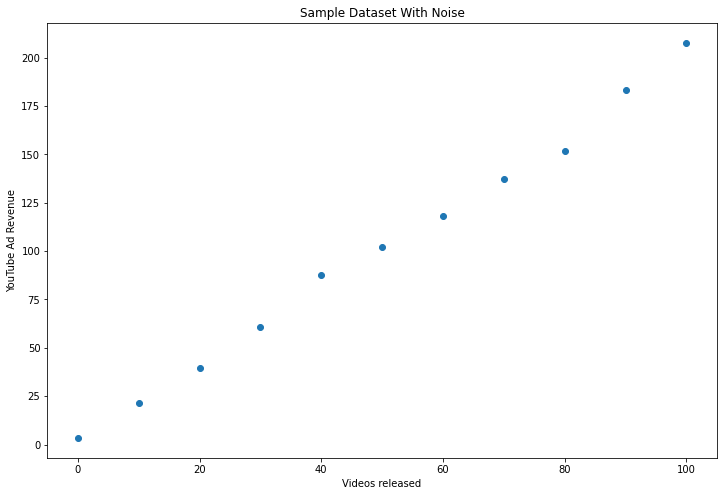

In [6]:
plt.title('Sample Dataset With Noise')

plt.xlabel('Videos released')
plt.ylabel('YouTube Ad Revenue')

plt.scatter(x, y)

plt.show()

In [7]:
np.corrcoef(x, y)

array([[1.        , 0.99756882],
       [0.99756882, 1.        ]])

Good correlation ($>= 0.5$) means that we should be able to fit a line fairly confidently. And that is true because as we saw we used the function $f(x) = 2x + 2$ to create the $y$-axis.

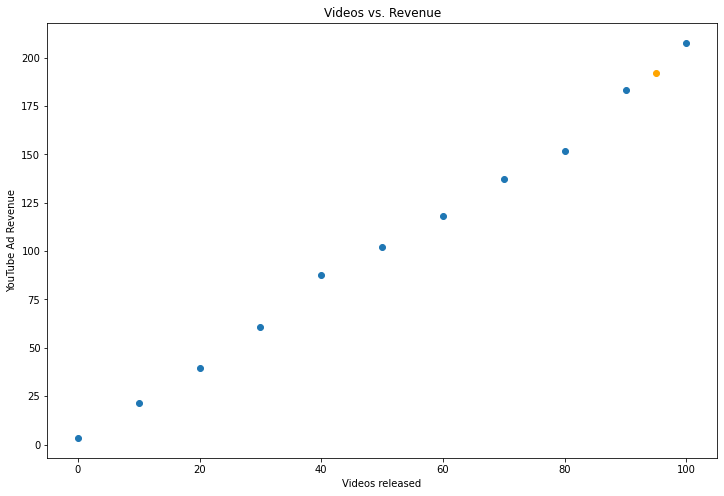

In [8]:
plt.title('Videos vs. Revenue')

plt.xlabel('Videos released')
plt.ylabel('YouTube Ad Revenue')

plt.scatter(x, y)
plt.scatter([95], [2*95 + 2], color='orange')

plt.show()

Let's use scikit-learn to find a linear function that minimizes the error.

In [9]:
x[..., np.newaxis].shape

(11, 1)

In [10]:
X = x[..., np.newaxis]

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
model.intercept_, model.coef_

(1.684427770656626, array([1.98818639]))

`.coef_` is an array holding values for $\vec{w}$ and `intercept_` is the value for $b$. The function the model found is:

$$y = 3.68 + 2x$$

Let's see how it looks:

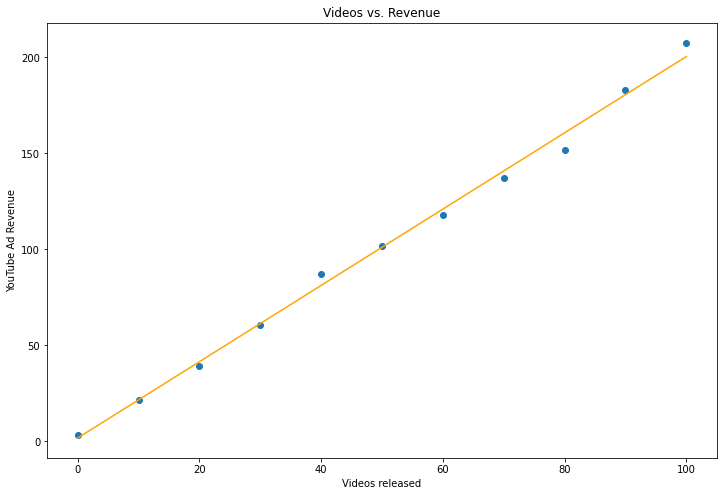

In [13]:
interval = np.arange(0, 101, 10)
result = interval * model.coef_[0] + model.intercept_

plt.title('Videos vs. Revenue')

plt.xlabel('Videos released')
plt.ylabel('YouTube Ad Revenue')

plt.scatter(X[:, 0], y)
plt.plot(interval, result, color='orange')

plt.show()

Now we can make predictions.

In [14]:
model.predict([[95]]), 2*95 + 2

(array([190.56213441]), 192)

This is pretty close to the true value.

Because predict takes in a matrix, we can make predictions for multiple points.

In [15]:
model.predict([[90], [95], [100]])

array([180.62120248, 190.56213441, 200.50306634])

## Generalization

A metric that measures the ability of a model to correctly label unseen data.

scikit-learn has predifined functions that allow us to see how well out model performs

In [16]:
model.score(X, y)

0.9951435497018508

The result from the `.score` method is a real number in the range $(-\infty, 1]$. The higher the better.

In classification this number would be in the range $[0, 1]$ and will correspond the percentage of correctly classified samples. For example, if $X$ were passengers and $y$ is whether they survived the Titanic sinking, a score of $0$ would indicate that the model made no correct predictions and a score of $1$ - only correct ones.

With regression scoring a model is a bit trickier. It should not be a big deal if the model predicts $\$200,375$ for a house that is actually worth $\$200,000$.

## The power of the log!

a.k.a. how to apply linear regression on non-linear functions

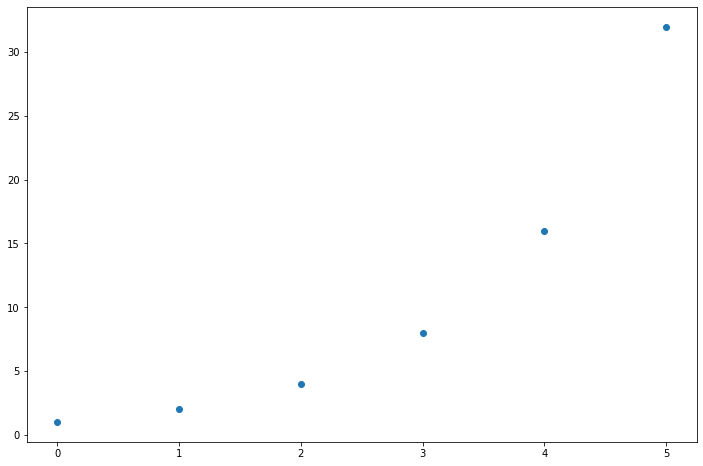

In [17]:
exp_data = np.array([[0, 1], [1, 2],  [2, 4], [3, 8], [4, 16], [5, 32]])

X, y = exp_data[:, 0:1], exp_data[:, 1]

plt.scatter(X[:, 0], y)
plt.show()

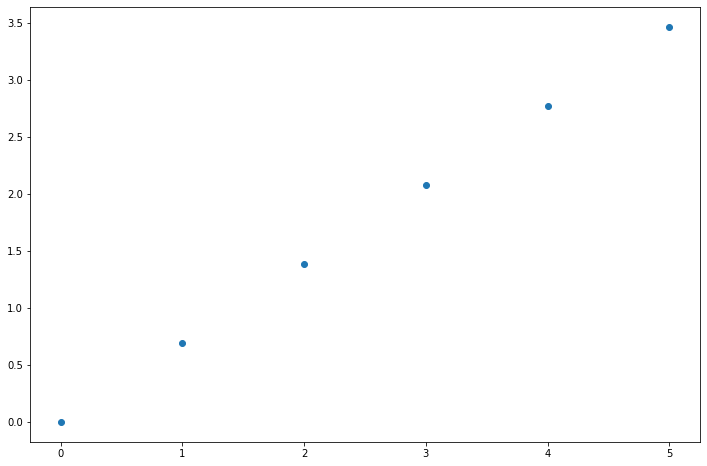

In [18]:
y_log = np.log(y)

plt.scatter(X, y_log)
plt.show()

In [19]:
model = LinearRegression()
model.fit(X, y_log)

prediction = model.predict([[8], [16]])
np.exp(prediction)

array([  256., 65536.])

Note that we have to convert the predictions back to the log scale.

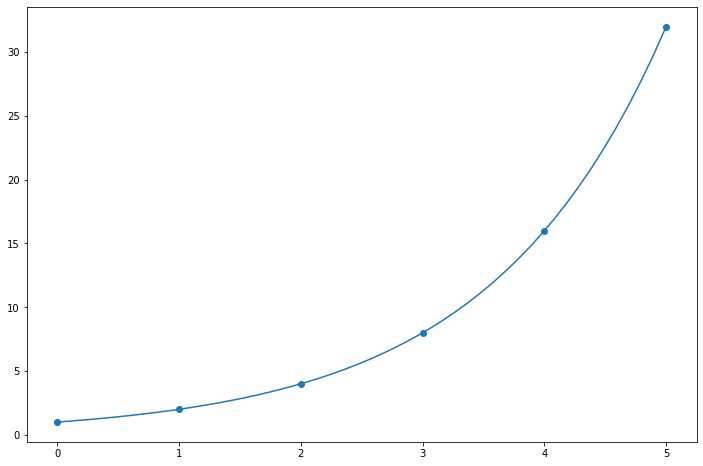

In [20]:
interval = np.linspace(0, 5)
result = np.exp(interval * model.coef_[0] + model.intercept_)

plt.scatter(X[:, 0], y)
plt.plot(interval, result)
plt.show()

## Overfitting and underfitting

* Underfitting – high training and testing error
* Overfitting – low training error but high testing error
* Appropriate-fitting – testing error is close to training error

![overfitting-vs-underfitting](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*JZbxrdzabrT33Yl-LrmShw.png&f=1&nofb=1)

## Polynomial Regression

This is an alternative way (to the log) to fit a model through the data.

In [21]:
linear_data = np.array([[0, 1], [2, 1.7], [8, 3], [9, 3.1], [10, 3.8]])
X, y = linear_data[:, 0:1], linear_data[:, 1]
X

array([[ 0.],
       [ 2.],
       [ 8.],
       [ 9.],
       [10.]])

In [22]:
y

array([1. , 1.7, 3. , 3.1, 3.8])

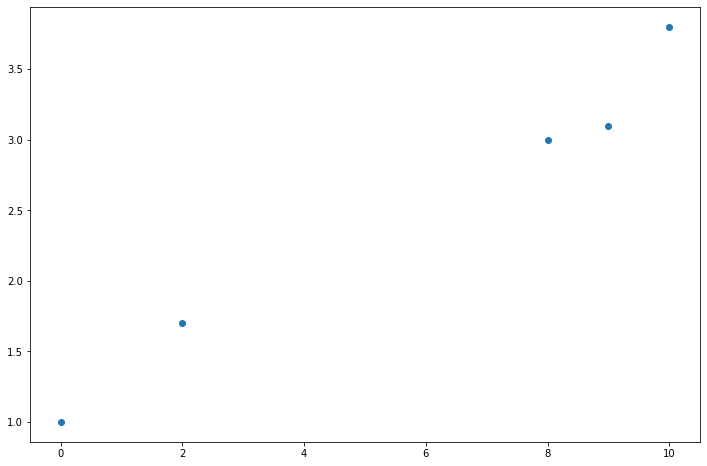

In [23]:
plt.scatter(X, y)
plt.show()

In [24]:
X_poly = np.concatenate((X, X**2, X**3), axis=1)
X_poly

array([[   0.,    0.,    0.],
       [   2.,    4.,    8.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

In [25]:
model = LinearRegression()
model.fit(X_poly, y)
model.intercept_, model.coef_

(0.9931658020945404, array([ 0.47903148, -0.06882004,  0.00483702]))

So if we draw the second degree polynomial we get this.

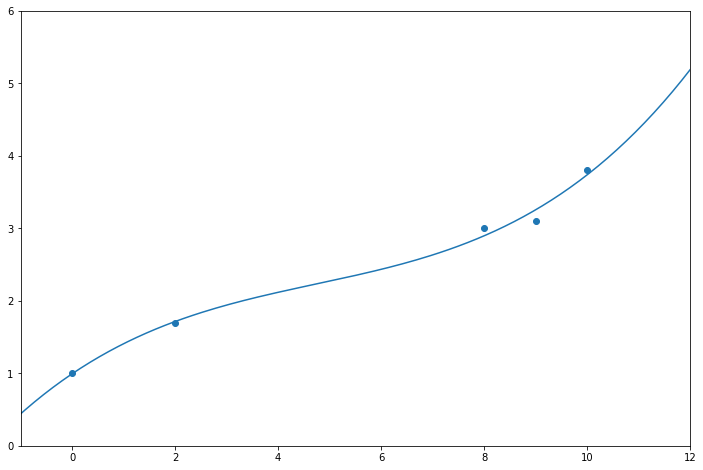

In [26]:
interval = np.linspace(-2, 16, num=200)

def create_poly(x):
    return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

plt.scatter(X[:, 0], y)
plt.plot(interval, create_poly(interval))
plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)
plt.show()

Let's fit an 8-th degree polynomial to our synthetic data to see what overfitting it would look like.

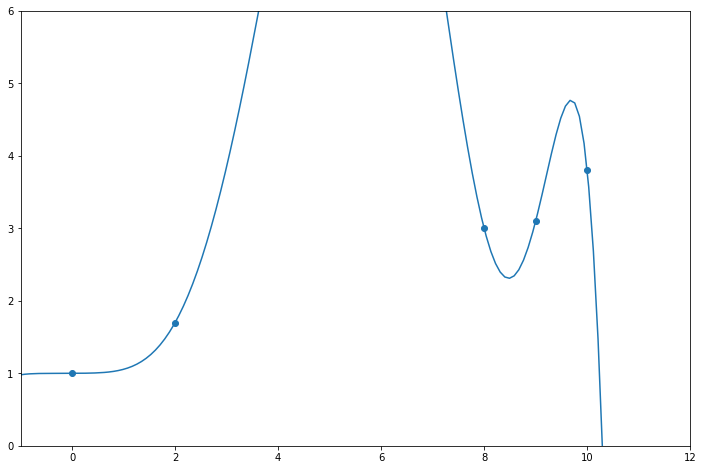

In [27]:
X_poly = np.concatenate((X, X**2, X**3, X**4, X**5, X**6, X**7, X**8), axis=1)

model = LinearRegression()
model.fit(X_poly, y)
model.intercept_, model.coef_

interval = np.linspace(-2, 16, num=200)

def create_poly(x):
    return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

plt.scatter(X[:, 0], y)
plt.plot(interval, create_poly(interval))
plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)
plt.show()

Here is the overfitting - we have found a very complex model that can predict the values for our training points perfectly, but will do very poorly on new data. Just think about what the model will predict for values between 2 and 8 and after 10 - they will not follow the rather linear relationship.

There are several ways to deal with missing values:

* Add more data.
* Regularization.

We'll show the latter.

Regularization is an algorithm that inflates the error function by adding more elements to the sum. The result is a less complex model.

In the case of linear regression there are two types of regularization algorithms that aim to reduce the size of the coefficients / weights:

* Ridge
* Lasso

The error function for the **ridge regression** is as follows:

\begin{equation*} Err(X) = \sum_{i=1}^n (y_i - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2 \end{equation*}

Notice:

* have the weights squared in the second sum. That means that models with larger weights will be considered worse, because they'll generate a larger error. Another name for the second sum is **L2 norm**. It comes from the way it is calculated - each coordinate of the vector is squared and all of them are added up.
* there is a new parameter $\lambda$ which is the coefficient of strictness, i.e. the larger it is, the more you'll punish models.

In [28]:
def draw_regularization(algorithm, alpha=1):
    model = algorithm(alpha=alpha, max_iter=100000)
    model.fit(X_poly, y)
    
    interval = np.linspace(-2, 16, num=200)

    def polynomial(x):
        return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

    plt.scatter(X[:, 0], y)
    plt.plot(interval, polynomial(interval))
    plt.gca().set_xlim(-1, 20)
    plt.gca().set_ylim(0, 10)

Watch now how regularization can help us control the weights of the overfit model.

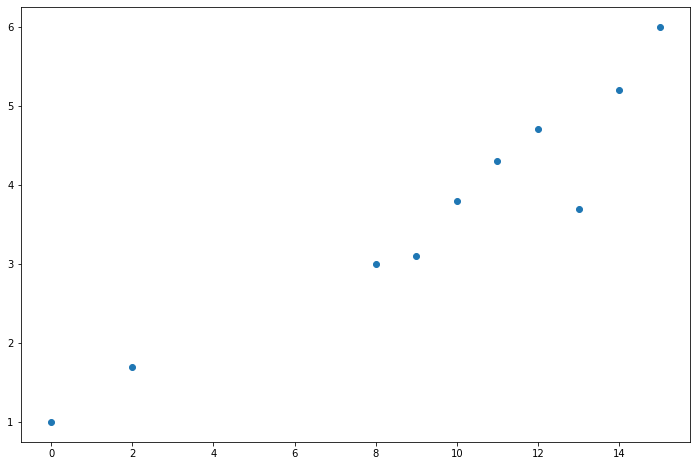

In [29]:
linear_data = np.array([[0, 1], [2, 1.7], [8, 3], [9, 3.1], [10, 3.8], [11, 4.3], [12, 4.7], [13, 3.7], [14, 5.2], [15, 6]])
X, y = linear_data[:, 0:1], linear_data[:, 1]
X_poly = np.concatenate((X, X**2, X**3, X**4, X**5, X**6, X**7, X**8), axis=1)
plt.scatter(X, y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.48596e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


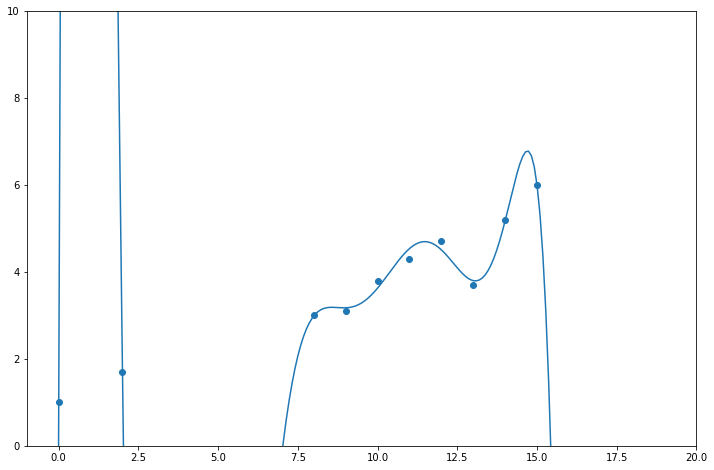

In [30]:
draw_regularization(Ridge, alpha=0)

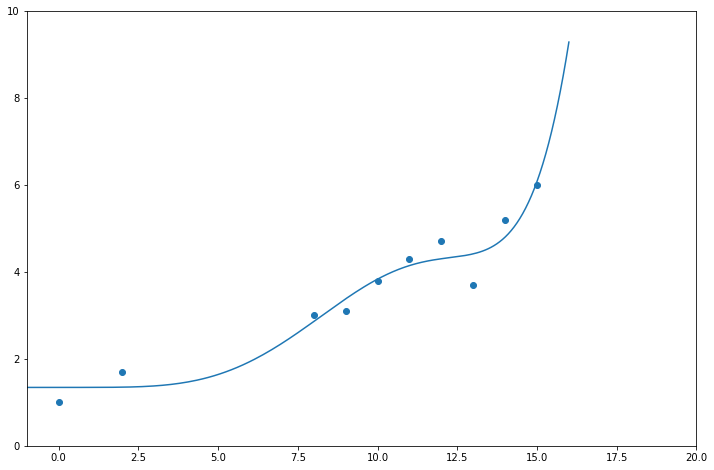

In [31]:
draw_regularization(Ridge, alpha=10000)

The error function for the **lasso regression** is as follows:

\begin{equation*} Err(X) = \sum_{i=1}^n (y_i - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p|\beta_j| \end{equation*}

Notice:

* the weights are no longer squared. This is known as **L1 norm**.
* the benefit from lasso is that coefficients can become 0, i.e. the feature can be disregarded. This cannot be achieved with Ridge.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.116e-01, tolerance: 2.103e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


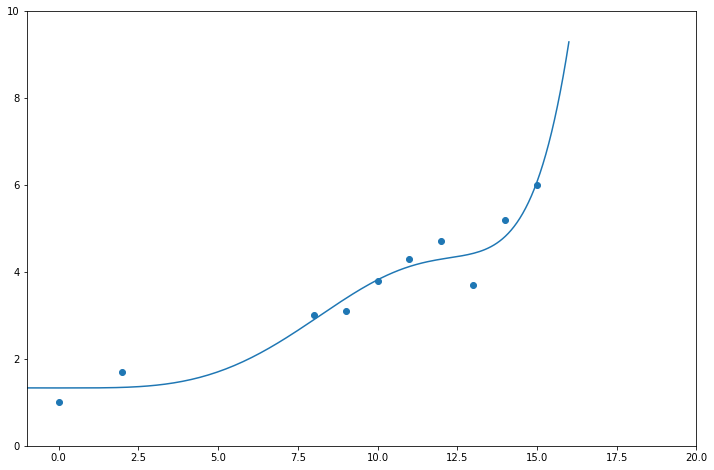

In [32]:
draw_regularization(Lasso, alpha=1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.404e-01, tolerance: 2.103e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


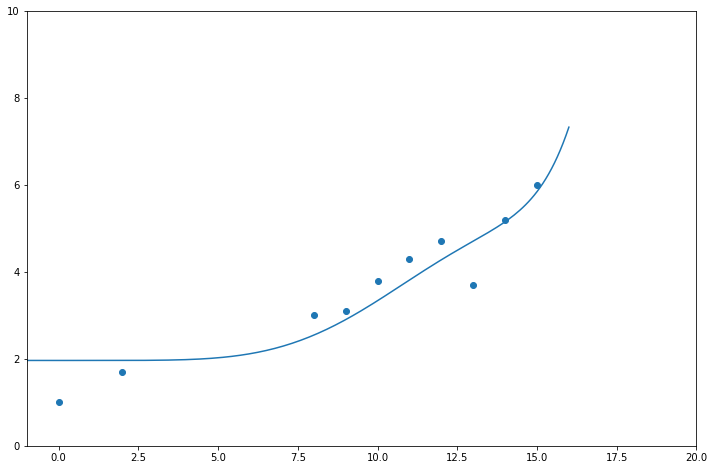

In [33]:
draw_regularization(Lasso, alpha=10000)